In [1]:
import matplotlib.pyplot as plt
import numpy as np

from environments.ocelot import ARESEAOcelot

initializing ocelot...


In [4]:
env = ARESEAOcelot()
observation = env.reset()

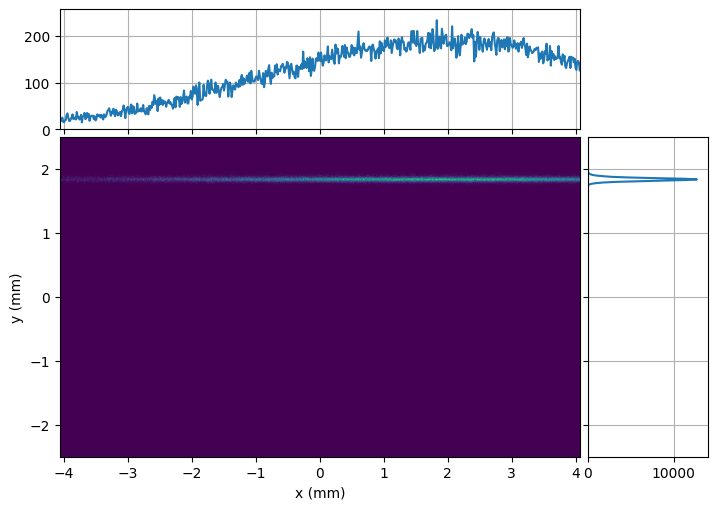

In [5]:
x_max = env.screen_resolution[0] * env.pixel_size[0] / 2 * 1e3
y_max = env.screen_resolution[1] * env.pixel_size[1] / 2 * 1e3
n_x = int(env.screen_resolution[0] / env.binning)
n_y = int(env.screen_resolution[1] / env.binning)

left, width = 0.1, 0.65
bottom, height = 0.1, (0.65*y_max/x_max)
spacing = 0.01

image_rect = [left, bottom, width, height]
x_sum_rect = [left, bottom + height + spacing, width, 0.15]
y_sum_rect = [left + width + spacing, bottom, 0.15, height]

fig = plt.figure(figsize=(8,8))

ax1 = fig.add_axes(image_rect)

ax3 = fig.add_axes(x_sum_rect, sharex=ax1)
ax3.set_ylim(0, env.screen_data.sum(axis=0).max()*1.1)
# ax3.set_yticks(ticks=(0.25,0.5,0.75,1))
# ax3.set_ylabel('intensity (au)')
# ax3.plot((angle_x,angle_x), (0,intensity_function(angle_x*1e-6,angle_y*1e-6)),linestyle='--',color = 'r')
ax3.tick_params(axis="x", labelbottom=False)
ax3.plot(np.linspace(-x_max,x_max,n_x), env.screen_data.sum(axis=0))
ax3.grid(True)

ax2 = fig.add_axes(y_sum_rect, sharey=ax1)
ax2.set_xlim(0, env.screen_data.sum(axis=1).max()*1.1)
# ax2.set_xticks(ticks=(0.25,0.5,0.75,1))
# ax2.set_xlabel('intensity (au)')
ax2.tick_params(axis="y", labelleft=False)
# ax2.plot((0,intensity_function(angle_x*1e-6,angle_y*1e-6)),(angle_y,angle_y),linestyle='--',color = 'r')
ax2.plot(env.screen_data.sum(axis=1), np.linspace(y_max,-y_max,n_y))
ax2.grid(True)

ax1.imshow(env.screen_data, interpolation=None, extent=(-x_max,x_max,-y_max,y_max))
# ax1.plot((angle_x,angle_x),ax.get_ylim(),linestyle='--',color = 'r')
# ax1.plot(ax.get_xlim(),(angle_y,angle_y),linestyle='--',color = 'r')
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")

plt.show()